## Evaluate ViT-B-16 on CIFAR-10

In [1]:
import os
import torch
import yaml
import utils
import numpy as np
import torchvision
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torchvision.transforms as transforms

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
MODEL_PATH = './checkpoints/vit-b-16_cifar-10/weights/best.pt'
BATCH_SIZE = 32
EPOCHS = 200
IMG_SIZE = 224
NUM_CLASSES = 10

In [6]:
model = torch.load(MODEL_PATH)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Files already downloaded and verified
Files already downloaded and verified


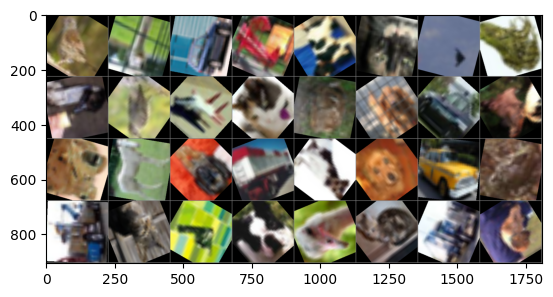

bird  bird  car   plane dog   cat   plane frog  bird  bird  plane cat   deer  dog   car   deer  frog  horse dog   truck dog   dog   car   frog  truck cat   plane dog   bird  cat   truck dog  


In [7]:
transform = transforms.Compose(
    [transforms.Resize((IMG_SIZE,IMG_SIZE)),
     torchvision.transforms.RandomRotation(degrees=90.0),
     torchvision.transforms.RandomVerticalFlip(p=0.5),
     torchvision.transforms.RandomHorizontalFlip(p=0.5),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

data_iter = iter(train_loader)
images, labels = next(data_iter)

utils.imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(BATCH_SIZE)))

In [10]:
test_loaders = [test_loader]

with torch.no_grad():
    
    for test_loader in test_loaders:

        test_loss_batches = []
        test_correct_preds_batches = []
        test_count = 0
        
        for i, (images, labels) in enumerate(test_loader):

            if torch.cuda.is_available():
                images = Variable(images.cuda())
                labels = Variable(labels.cuda())

            outputs = model(images)
            preds = torch.argmax(outputs, 1)
            
            test_loss_curr = criterion(outputs, labels)

            test_count = test_count+len(images)

            test_loss_batch = test_loss_curr.item()
            test_loss_batches.append(test_loss_batch)
            test_loss = round(np.sum(np.array(test_loss_batches))/test_count, 4)

            test_correct_preds_batch = (preds == labels).sum().item()
            test_correct_preds_batches.append(test_correct_preds_batch)
            test_acc = round(np.sum(test_correct_preds_batches)/test_count, 4)

            print(f'Test --> {test_acc}')

print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')

Test --> 0.9688
Test --> 0.9531
Test --> 0.9375
Test --> 0.9375
Test --> 0.9438
Test --> 0.9531
Test --> 0.9554
Test --> 0.9531
Test --> 0.9549
Test --> 0.95
Test --> 0.9489
Test --> 0.9453
Test --> 0.9447
Test --> 0.9487
Test --> 0.9458
Test --> 0.9473
Test --> 0.9485
Test --> 0.9514
Test --> 0.9539
Test --> 0.9547
Test --> 0.9568
Test --> 0.9574
Test --> 0.9592
Test --> 0.957
Test --> 0.9575
Test --> 0.9567
Test --> 0.956
Test --> 0.9554
Test --> 0.9558
Test --> 0.9552
Test --> 0.9556
Test --> 0.9551
Test --> 0.9564
Test --> 0.9559
Test --> 0.9554
Test --> 0.9557
Test --> 0.9552
Test --> 0.9548
Test --> 0.9551
Test --> 0.9547
Test --> 0.9512
Test --> 0.9509
Test --> 0.9513
Test --> 0.951
Test --> 0.9521
Test --> 0.9518
Test --> 0.9515
Test --> 0.9518
Test --> 0.9515
Test --> 0.9519
Test --> 0.9522
Test --> 0.9513
Test --> 0.9522
Test --> 0.9525
Test --> 0.9528
Test --> 0.9537
Test --> 0.9539
Test --> 0.9531
Test --> 0.9539
Test --> 0.9531
Test --> 0.9524
Test --> 0.9526
Test --> 0.95